In [1]:
import pandas_profiling
from pyspark.sql import SparkSession
from pyspark import SparkContext, SparkConf
import pandas as pd

spark = SparkSession\
.builder\
.master('local')\
.appName('Capstone_Project')\
.config("spark.jars.packages", "org.apache.hadoop:hadoop-aws:2.7.3")\
.getOrCreate()

spark

In [24]:
############Prod#################

#Dependencies
import pandas as pd
import time
from pyspark.sql import functions as F
from pyspark.sql.functions import isnan, when, count, col
from pyspark.sql.types import TimestampType
import pandas_profiling as pdf
#####dataframe 
pms_df = spark.read.csv(r'C:\Users\luisj\Documents\Project Folders\Pandas_profiling\player_matches_small_v1.csv' , header=True)
#pms_df.withColumn("timestamp", pms_df["timestamp"].cast(TimestampType()))
df_to_profile = pms_df
df_columns_to_profile = df_to_profile.columns
#####Configuration
database_name = 'database_name1'
table_name = 'table_name2'

In [25]:
#####creating profiling_df
start = time.time()
profiling_df = pd.DataFrame({'database_name':[database_name] * len(df_to_profile.columns),\
                                        'table_name':[table_name] * len(df_to_profile.columns),\
                                        'column_names':df_to_profile.columns,\
                                        'data_types': [x[1] for x in df_to_profile.dtypes]})
print('initial profiling dataframe created')

initial profiling dataframe created


In [26]:
#####row_counts
num_rows = df_to_profile.count()
profiling_df['num_rows'] = num_rows
print('num of rows included in the profiling')

num of rows included in the profiling


In [27]:
#####count nulls 
df_nulls_nan = df_to_profile.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_to_profile.columns if df_to_profile.select(c).dtypes[0][1] != 'timestamp']).toPandas().transpose()
df_nulls_nan = df_nulls_nan.reset_index()
df_nulls_nan.columns = ['column_names', 'num_null']
profiling_df = pd.merge(profiling_df, df_nulls_nan, on = ['column_names'], how = 'left')

In [28]:
#####describe_function
df_describe_function = df_to_profile.describe().toPandas().transpose()
df_describe_function.columns = ['count', 'mean', 'standar_dev', 'min', 'max']
df_describe_function = df_describe_function.iloc[1:,:]
df_describe_function = df_describe_function.reset_index()
df_describe_function.columns.values[0] = 'column_names'
df_describe_function = df_describe_function[['column_names', 'count', 'mean', 'standar_dev', 'min', 'max']]
profiling_df = pd.merge(profiling_df, df_describe_function, on =['column_names'], how = 'left')   

In [9]:
#####Number of distinct
#profiling_df['num_distinct'] = [df_to_profile.select(x).distinct().count() for x in df_to_profile.columns]

In [4]:
##############################testing_env################################

In [41]:
profiling_df[['count', 'min', 'max']] = profiling_df[['count', 'min', 'max']].astype('int64')

In [43]:
profiling_df[['mean', 'standar_dev']] = profiling_df[['mean', 'standar_dev']].astype('float64')

In [44]:
profiling_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 11 columns):
database_name    24 non-null object
table_name       24 non-null object
column_names     24 non-null object
data_types       24 non-null object
num_rows         24 non-null int64
num_null         24 non-null int64
count            24 non-null int64
mean             24 non-null float64
standar_dev      24 non-null float64
min              24 non-null int64
max              24 non-null int64
dtypes: float64(2), int64(5), object(4)
memory usage: 2.9+ KB


In [49]:
def color_negative_red(val):
    if type(val) == int:
        if val <= 0:
            color = 'red'
        elif val > 0:
            color = 'green'
        else:
            color = 'black'
    else:
        color = 'black'
    #color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

In [50]:
profiling_df.style.applymap(color_negative_red)

,database_name,table_name,column_names,data_types,num_rows,num_null,count,mean,standar_dev,min,max
0,database_name1,table_name2,match_id,string,1048575,0,1048575,3.88008e+08,1.398e+08,2317776728,379940939
1,database_name1,table_name2,account_id,string,1048575,1046435,2140,1.58239e+08,8.60799e+07,100294079,99900959
2,database_name1,table_name2,player_slot,string,1048575,0,1048575,65.7728,64.0165,0,4
3,database_name1,table_name2,hero_id,string,1048575,0,1048575,45.8384,29.5684,0,99
4,database_name1,table_name2,item_0,string,1048575,0,1048575,92.8944,61.334,0,99
5,database_name1,table_name2,item_1,string,1048575,0,1048575,91.7693,60.1776,0,99
6,database_name1,table_name2,item_2,string,1048575,0,1048575,85.7689,61.0202,0,99
7,database_name1,table_name2,item_3,string,1048575,0,1048575,75.8887,61.8978,0,99
8,database_name1,table_name2,item_4,string,1048575,0,1048575,59.8814,61.9329,0,99
9,database_name1,table_name2,item_5,string,1048575,0,1048575,40.2509,56.098,0,99


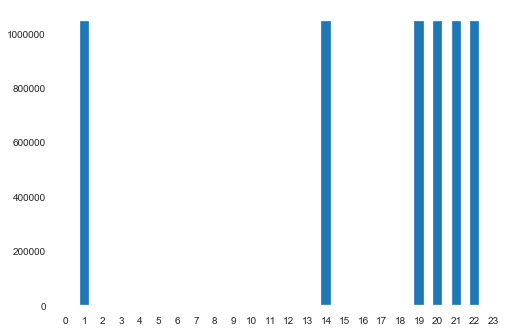

In [57]:
profiling_df.num_null.plot.bar(rot=0)

In [58]:
profiling_df.to_csv(r'C:\Users\luisj\Documents\Project Folders\Pandas_profiling\profiling_df.csv', index=False)

In [1]:
import pandas as pd
import time
from pyspark.sql import functions as F
from pyspark.sql.functions import isnan, when, count, col
from pyspark.sql.types import TimestampType
import pandas_profiling as pdf

In [59]:
spark.stop()

In [3]:
df_to_pandas_profiling = pd.read_csv(r'C:\Users\luisj\Documents\Project Folders\Pandas_profiling\player_matches_small.csv')

MemoryError: 

In [25]:
pdf.ProfileReport(df_to_pandas_profiling, minimal=True)

NameError: name 'df_to_pandas_profiling' is not defined

In [77]:
df.count()

match_id            3964
account_id             0
player_slot         3964
hero_id             3964
item_0              3964
item_1              3964
item_2              3964
item_3              3964
item_4              3964
item_5              3964
kills               3964
deaths              3964
assists             3964
leaver_status       3964
gold                   0
last_hits           3964
denies              3964
gold_per_min        3964
xp_per_min          3964
gold_spent             0
hero_damage            0
tower_damage           0
hero_healing           0
level               3964
additional_units      21
stuns                 21
max_hero_hit          21
times                 21
gold_t                21
lh_t                  21
xp_t                  21
obs_log                0
sen_log                0
purchase_log           0
kills_log              0
buyback_log            0
lane_pos               0
obs                    0
sen                    0
actions                0


In [75]:
start = time.time()
pdf.ProfileReport(df)
end = time.time()
delta = end - start
print(delta)

correlations [recoded]: 100%|██████████| 6/6 [00:04<00:00,  1.20it/s]
interactions [continuous]: 0it [00:00, ?it/s]
build report structure:   0%|          | 0/1 [00:00<?, ?it/s]ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:61126)
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\py4j\java_gateway.py", line 929, in _get_connection
    connection = self.deque.pop()
IndexError: pop from an empty deque

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\py4j\java_gateway.py", line 1067, in start
    self.socket.connect((self.address, self.port))
ConnectionRefusedError: [WinError 10061] No connection could be made because the target machine actively refused it
ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:61126)
Traceback (most recent call last):
  File "

In [76]:
pdf.ProfileReport(df)


correlations [recoded]: 100%|██████████| 6/6 [00:04<00:00,  1.26it/s]
interactions [continuous]: 0it [00:00, ?it/s]
build report structure: 100%|██████████| 1/1 [00:04<00:00,  4.09s/it]


In [92]:
#Dependencies
import pandas as pd
import time
from pyspark.sql import functions as F
from pyspark.sql.functions import isnan, when, count, col
import pandas_profiling

#

#dataframe 
pms_df = spark.read.csv(r'C:\Users\luisj\Documents\Project Folders\Pandas_profiling\player_matches_small_extra.csv' , header=True)
df_to_profile = pms_df
#Configuration
df_columns_to_profile = df_to_profile.columns
database_name = 'database_name1'
table_name = 'table_name2'



In [89]:
import time
from pyspark.sql import functions as F
from pyspark.sql.functions import isnan, when, count, col

def profiling_dataframe(database, table):
    start = time.time()
    profiling_df = pd.DataFrame({'database_name':[database_name] * len(df_to_profile.columns),\
                                         'table_name':[table_name] * len(df_to_profile.columns),\
                                         'column_names':df_to_profile.columns,\
                                         'data_types': [x[1] for x in df_to_profile.dtypes]})
    print('initial profiling dataframe created')
    ####row_counts
    num_rows = df_to_profile.count()
    profiling_df['num_rows'] = num_rows
    print('num of rows included in the profiling')
    ###
    #nulls and NaN
    df_nulls_nan = df_nulls_nan.reset_index()
    df_nulls_nan.columns = ['column_names', 'num_null']
    profiling_df = pd.merge(profiling_df, df_nulls_nan, on = ['column_names'], how = 'left')
    #add the describe function

    
    end = time.time()
    delta = end - start
    print(delta)
    return profiling_df

In [90]:
start = time.time()
profiling_df = pd.DataFrame({'database_name':[database_name] * len(df_to_profile.columns),\
                                        'table_name':[table_name] * len(df_to_profile.columns),\
                                        'column_names':df_to_profile.columns,\
                                        'data_types': [x[1] for x in df_to_profile.dtypes]})
print('initial profiling dataframe created')
####row_counts
num_rows = df_to_profile.count()
profiling_df['num_rows'] = num_rows
print('num of rows included in the profiling')
###
#nulls and NaN
df_nulls_nan = df_nulls_nan.reset_index()
df_nulls_nan.columns = ['column_names', 'num_null']
profiling_df = pd.merge(profiling_df, df_nulls_nan, on = ['column_names'], how = 'left')
#add the describe function

    
end = time.time()
delta = end - start
print(delta)

initial profiling dataframe created
num of rows included in the profiling


ValueError: Length mismatch: Expected axis has 3 elements, new values have 2 elements

In [29]:
start = time.time()
df_describe_function = df_to_profile.describe().toPandas().transpose()
df_describe_function.columns = ['count', 'mean', 'standar_dev', 'min', 'max']
df_describe_function = df_describe_function.iloc[1:,:]
df_describe_function = df_describe_function.reset_index()
df_describe_function.columns.values[0] = 'column_names'
df_describe_function = df_describe_function[['column_names', 'count', 'mean', 'standar_dev', 'min', 'max']]
df_describe_function = pd.merge(profiling_dataframe)
end = time.time()
delta = end - start
print(delta)

1036.2952415943146


In [43]:
df_describe_function1.columns.values[0] = 'column_names'

In [70]:
df_describe_function1 = df_describe_function.iloc[1:,:]

In [87]:
df_describe_function2 = df_describe_function1[['column_names', 'count', 'mean', 'standar_dev', 'min', 'max']]

KeyError: '[] not in index'

In [88]:
df_describe_function.columns

Index(['column_names', 'count', 'mean', 'standar_dev', 'min', 'max'], dtype='object')

In [78]:
df_describe_function1

,column_names,count,mean,standar_dev,min,max
1,match_id,37940670,4.219745550878603E8,2.6834569316915986E8,1001479171,998335630
2,account_id,291037,1.746032229399011E8,2.93776702266683E8,100000719,99999754
3,player_slot,37940670,65.87708432666055,64.01774806777671,0,4
4,hero_id,37940670,46.19535042475528,30.786296734015657,0,99
5,item_0,37940670,95.06261969016361,60.96194350631774,0,99
6,item_1,37940670,97.65679920781578,60.20577375535378,0,99
7,item_2,37940670,92.34240201873082,61.27212584592936,0,99
8,item_3,37940670,83.7606773417549,62.43627937577911,0,99
9,item_4,37940670,70.69595932280585,64.16278420322762,0,99
10,item_5,37940670,51.52560481931395,61.517603864008365,0,99


In [74]:
profiling_dataframe

,database_name,table_name,column_names,data_types,num_rows,num_null
0,database_name1,table_name2,match_id,string,37940670,0
1,database_name1,table_name2,account_id,string,37940670,37649633
2,database_name1,table_name2,player_slot,string,37940670,0
3,database_name1,table_name2,hero_id,string,37940670,0
4,database_name1,table_name2,item_0,string,37940670,0
5,database_name1,table_name2,item_1,string,37940670,0
6,database_name1,table_name2,item_2,string,37940670,0
7,database_name1,table_name2,item_3,string,37940670,0
8,database_name1,table_name2,item_4,string,37940670,0
9,database_name1,table_name2,item_5,string,37940670,0


In [72]:
profiling_dataframe1 = pd.merge(profiling_dataframe, df_describe_function1, on = ['column_names'], how = 'left')

KeyError: 'column_names'

In [64]:
profiling_dataframe

,database_name,table_name,column_names,data_types,num_rows,num_null
0,database_name1,table_name2,match_id,string,37940670,0
1,database_name1,table_name2,account_id,string,37940670,37649633
2,database_name1,table_name2,player_slot,string,37940670,0
3,database_name1,table_name2,hero_id,string,37940670,0
4,database_name1,table_name2,item_0,string,37940670,0
5,database_name1,table_name2,item_1,string,37940670,0
6,database_name1,table_name2,item_2,string,37940670,0
7,database_name1,table_name2,item_3,string,37940670,0
8,database_name1,table_name2,item_4,string,37940670,0
9,database_name1,table_name2,item_5,string,37940670,0


In [65]:
df_describe_function1

,column_names,count,mean,standar_dev,min,max
0,summary,count,mean,stddev,min,max
1,match_id,37940670,4.219745550878603E8,2.6834569316915986E8,1001479171,998335630
2,account_id,291037,1.746032229399011E8,2.93776702266683E8,100000719,99999754
3,player_slot,37940670,65.87708432666055,64.01774806777671,0,4
4,hero_id,37940670,46.19535042475528,30.786296734015657,0,99
5,item_0,37940670,95.06261969016361,60.96194350631774,0,99
6,item_1,37940670,97.65679920781578,60.20577375535378,0,99
7,item_2,37940670,92.34240201873082,61.27212584592936,0,99
8,item_3,37940670,83.7606773417549,62.43627937577911,0,99
9,item_4,37940670,70.69595932280585,64.16278420322762,0,99


In [6]:
start = time.time()
profiling_dataframe = pd.DataFrame({'database_name':[database_name] * len(df_to_profile.columns),\
                                    'table_name':[table_name] * len(df_to_profile.columns),\
                                    'column_names':df_to_profile.columns,\
                                    'data_types': [x[1] for x in df_to_profile.dtypes]})
print('initial profiling dataframe created')
####row_counts
num_rows = df_to_profile.count()
profiling_dataframe['num_rows'] = num_rows
print('num of rows included in the profiling')

initial profiling dataframe created
num of rows included in the profiling


In [12]:
import time
from pyspark.sql import functions as F
from pyspark.sql.functions import isnan, when, count, col
start = time.time()
#df_nulls_nan = df_to_profile.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_to_profile.columns]).show()
df_nulls_nan = df_to_profile.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_to_profile.columns if df_to_profile.select(c).dtypes[0][1] != 'timestamp']).toPandas().transpose()
end = time.time()
delta = end - start
print(delta)
df_nulls_nan

689.7776165008545


,0
match_id,0
account_id,37649633
player_slot,0
hero_id,0
item_0,0
item_1,0
item_2,0
item_3,0
item_4,0
item_5,0


In [15]:
df_nulls_nan.head()

,0
match_id,0
account_id,37649633
player_slot,0
hero_id,0
item_0,0


In [25]:
df_nulls_nan = df_nulls_nan.reset_index()
df_nulls_nan.columns = ['column_names', 'num_null']
profiling_dataframe = pd.merge(profiling_dataframe, df_nulls_nan, on = ['column_names'], how = 'left')

In [26]:
profiling_dataframe = pd.merge(profiling_dataframe, df_nulls_nan, on = ['column_names'], how = 'left')

In [24]:
profiling_dataframe

,database_name,table_name,column_names,data_types,num_rows
0,database_name1,table_name2,match_id,string,37940670
1,database_name1,table_name2,account_id,string,37940670
2,database_name1,table_name2,player_slot,string,37940670
3,database_name1,table_name2,hero_id,string,37940670
4,database_name1,table_name2,item_0,string,37940670
5,database_name1,table_name2,item_1,string,37940670
6,database_name1,table_name2,item_2,string,37940670
7,database_name1,table_name2,item_3,string,37940670
8,database_name1,table_name2,item_4,string,37940670
9,database_name1,table_name2,item_5,string,37940670


In [86]:
def row_count(df_to_profile, profiling_dataframe):
    num_rows = df_to_profile.count()
    profiling_dataframe['num_rows'] = num_rows
    return profiling_dataframe


In [87]:
profiling_dataframe(df_to_profile, profiling_dataframe(database_name, table_name))

initial profiling dataframe created
initial profiling dataframe created


,database_name,table_name,column_names,data_types
0,database_name1,table_name2,match_id,string
1,database_name1,table_name2,account_id,string
2,database_name1,table_name2,player_slot,string
3,database_name1,table_name2,hero_id,string
4,database_name1,table_name2,item_0,string
5,database_name1,table_name2,item_1,string
6,database_name1,table_name2,item_2,string
7,database_name1,table_name2,item_3,string
8,database_name1,table_name2,item_4,string
9,database_name1,table_name2,item_5,string


In [71]:
num_rows

37940670

In [61]:
initial_pandas_dataframe(database_name, table_name)

initial profiling dataframe created


,database_name,table_name,column_names,data_types
0,database_name1,table_name2,match_id,string
1,database_name1,table_name2,account_id,string
2,database_name1,table_name2,player_slot,string
3,database_name1,table_name2,hero_id,string
4,database_name1,table_name2,item_0,string
5,database_name1,table_name2,item_1,string
6,database_name1,table_name2,item_2,string
7,database_name1,table_name2,item_3,string
8,database_name1,table_name2,item_4,string
9,database_name1,table_name2,item_5,string


In [56]:
profiling_dataframe.heaad()

NameError: name 'profiling_dataframe' is not defined

In [29]:
df = df_to_profile.select(df_columns_to_profile)
dataframe_profiling = pd.DataFrame({'database_name':[database_name], 'table_name':[table_name]})

In [33]:
import time

start = time.time()
num_rows = df.count()
dataframe_profiling['num_rows'] = num_rows
end = time.time()
delta = end - start
print(delta)

24.149837732315063


In [34]:
dataframe_profiling.head()

,database_name,table_name,num_rows
0,database_name1,table_name2,37940670


In [39]:
#df_nulls_nan = df.select([count(when(isnan(c) | col(c).isNull()).alias(c) for c in df_columns_to_profile if df.select(c).dtypes[0][1] != 'timestamp']).toPandas().transpose()

df_nulls_nan = df.select([count(when(isnan(c)))])


NameError: name 'count' is not defined

In [ ]:
#Query for the data profiling
database_name = ''
table_name = ''
where = ''
query = 'SELECT * FROM' + database_name + '.' + table_name + '' + where
print('table to query ->' + database_name + '.' + table_name)
profiling_table = spark.sql(query)
print( 'The table' + table_name + ' is converted into a', type(df))

In [18]:
df_to_profile = pms_df
df_columns_to_profile = df_to_profile.columns

#######
df = df_to_profile.select(df_columns_to_profile)
dataframe_profiling = pd.DataFrame({'database_name':[database_name], 'table_name':[table_name]})

num_rows = df.count()
dataframe_profiling['num_rows'] = num_rows

c
dataframe_profiling.show()
df_nulls_nan.show()




SyntaxError: invalid syntax (<ipython-input-18-fa7a0c052cbf>, line 13)

In [17]:
import pandas as pd
from pyspark.sql import functions as F
from pyspark.sql import isnan, when, count, col


def data_profile( df_to_profile, df_columns_to_profile):
    df = df_to_profile.select(df_columns_to_profile)
    dataframe_profiling = pd.DataFrame({'database_name':[database_name], 'table_name':[table_name]})
    print("Data selected and pandas dataframes created")
    ##row count
    num_rows = df.count()
    dataframe_profiling['num_rows'] = num_rows
    print("Number of rows has been calculated")
    ##nulls & NaN
    df_nulls_nan = df.select([count(when(isnan(df) | col(df).isNull()))
    #if df.select(df).dtypes[0][1]!='timestamp']).toPandas().transpose()
    #df_nulls_nan = df_nulls_nan.reset.index()
    
    return dataframe_profiling

SyntaxError: invalid syntax (<ipython-input-17-c02e7d962715>, line 19)

In [ ]:
dataframe_profiling = pd.DataFrame({'database_name':[database_name], 'table_name':[table_name]})

In [ ]:
def dataprofile(data_all_df, data_cols):
    data_df = data_all_df.select(data_cols)
    columns2Bprofiled = data_df.columns
    global schema_name, table_name
    if not 'schema_name' in globals():
        schema_name = 'schema_name'
    if not 'table_name' in globals():
        table_name = 'table_name' 
    dprof_df = pd.DataFrame({'schema_name':[schema_name] * len(data_df.columns),\
                             'table_name':[table_name] * len(data_df.columns),\
                             'column_names':data_df.columns,\
                             'data_types':[x[1] for x in data_df.dtypes]}) 
    dprof_df = dprof_df[['schema_name','table_name','column_names', 'data_types']]
    dprof_df.set_index('column_names', inplace=True, drop=False)
    # ======================
    num_rows = data_df.count()
    dprof_df['num_rows'] = num_rows
    # ======================    
    # number of rows with nulls and nans   
    df_nacounts = data_df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in data_df.columns \
                                  if data_df.select(c).dtypes[0][1]!='timestamp']).toPandas().transpose()
    df_nacounts = df_nacounts.reset_index()  
    df_nacounts.columns = ['column_names','num_null']
    dprof_df = pd.merge(dprof_df, df_nacounts, on = ['column_names'], how = 'left')
    # ========================
    # number of rows with white spaces (one or more space) or blanks
    num_spaces = [data_df.where(F.col(c).rlike('^\\s+$')).count() for c in data_df.columns]
    dprof_df['num_spaces'] = num_spaces
    num_blank = [data_df.where(F.col(c)=='').count() for c in data_df.columns]
    dprof_df['num_blank'] = num_blank
    # =========================
    # using the in built describe() function 
    desc_df = data_df.describe().toPandas().transpose()
    desc_df.columns = ['count', 'mean', 'stddev', 'min', 'max']
    desc_df = desc_df.iloc[1:,:]  
    desc_df = desc_df.reset_index()  
    desc_df.columns.values[0] = 'column_names'  
    desc_df = desc_df[['column_names','count', 'mean', 'stddev']] 
    dprof_df = pd.merge(dprof_df, desc_df , on = ['column_names'], how = 'left')
    # ===========================================
    allminvalues = [data_df.select(F.min(x)).limit(1).toPandas().iloc[0][0] for x in columns2Bprofiled]
    allmaxvalues = [data_df.select(F.max(x)).limit(1).toPandas().iloc[0][0] for x in columns2Bprofiled]
    allmincounts = [data_df.where(col(x) == y).count() for x,y in zip(columns2Bprofiled, allminvalues)]
    allmaxcounts = [data_df.where(col(x) == y).count() for x,y in zip(columns2Bprofiled, allmaxvalues)]    
    df_counts = dprof_df[['column_names']]
    df_counts.insert(loc=0, column='min', value=allminvalues)
    df_counts.insert(loc=0, column='counts_min', value=allmincounts)
    df_counts.insert(loc=0, column='max', value=allmaxvalues)
    df_counts.insert(loc=0, column='counts_max', value=allmaxcounts)
    df_counts = df_counts[['column_names','min','counts_min','max','counts_max']]
    dprof_df = pd.merge(dprof_df, df_counts , on = ['column_names'], how = 'left')  
    # ==========================================
    # number of distinct values in each column
    dprof_df['num_distinct'] = [data_df.select(x).distinct().count() for x in columns2Bprofiled]
    # ============================================
    # most frequently occuring value in a column and its count
    dprof_df['most_freq_valwcount'] = [data_df.groupBy(x).count().sort("count",ascending=False).limit(1).\
                                       toPandas().iloc[0].values.tolist() for x in columns2Bprofiled]
    dprof_df['most_freq_value'] = [x[0] for x in dprof_df['most_freq_valwcount']]
    dprof_df['most_freq_value_count'] = [x[1] for x in dprof_df['most_freq_valwcount']]
    dprof_df = dprof_df.drop(['most_freq_valwcount'],axis=1)
    # least frequently occuring value in a column and its count
    dprof_df['least_freq_valwcount'] = [data_df.groupBy(x).count().sort("count",ascending=True).limit(1).\
                                        toPandas().iloc[0].values.tolist() for x in columns2Bprofiled]
    dprof_df['least_freq_value'] = [x[0] for x in dprof_df['least_freq_valwcount']]
    dprof_df['least_freq_value_count'] = [x[1] for x in dprof_df['least_freq_valwcount']]
    dprof_df = dprof_df.drop(['least_freq_valwcount'],axis=1)

    return dprof_df

In [80]:
spark.stop()

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:61126)
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\py4j\java_gateway.py", line 929, in _get_connection
    connection = self.deque.pop()
IndexError: pop from an empty deque

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\py4j\java_gateway.py", line 1067, in start
    self.socket.connect((self.address, self.port))
ConnectionRefusedError: [WinError 10061] No connection could be made because the target machine actively refused it
ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:61126)
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\py4j\java_gateway.py", line 929, in _get_connection
    connection = self.deque.pop()
IndexError: pop from an empty deque

During hand

Py4JNetworkError: An error occurred while trying to connect to the Java server (127.0.0.1:61126)